Bibliotecas e funções auxiliares:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def euler(omega):
    return np.exp(1j*omega)

def real2complex(mag, ang):
    return mag * np.exp(1j*ang)

def imshow(img):
    plt.imshow(img, cmap="gray")
    plt.show()
    plt.close()

Carregando imagem de teste:

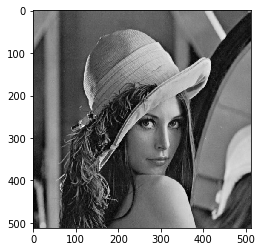

In [2]:
img = cv2.imread("lenna.jpg", cv2.IMREAD_GRAYSCALE)
imshow(img)

A propriedade do shift na frequência é escrita como:

$$F^{-1}[X(j\omega \pm \omega_{0})] = x(t)e^{\mp j\omega_{0}t}$$

Vamos calcular a transformade, suas magnitude e fase, além do ângulo $\omega_{0}$:

In [6]:
fft2 = np.fft.fft2(img)
magnitude = np.abs(fft2)
angle = np.angle(fft2)
omega = np.pi

Vamos criar um número complexo a partir da magnitude original e da fase adicionada de $\omega_{0}$, e depois aplicaremos a inversa nesse número:

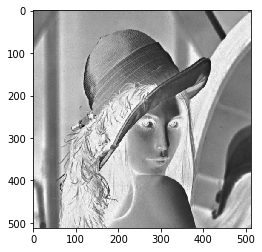

In [7]:
new_angle = angle + omega
c = real2complex(magnitude, new_angle)
inv_c = np.fft.ifft2(c)
imshow(inv_c.real)

Por, vamos multiplar a imagem original pelo número complexo adequado (lado direito da equação da propriedade) e verificar os resultados:

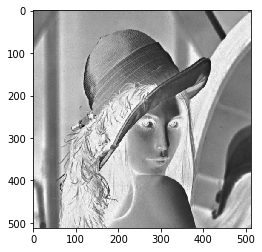

In [8]:
img2 = img * euler(-1*omega)
imshow(img2.real)